#### "All code that I am submitting is written entirely by me. It may contain some portions of code shown by the instructor in class while solving RL problems. Aside from this, I have not used code written by others or shown/shared my code with anyone."

Import dependencies

In [8]:
import sys
import gym
import numpy as np
from collections import defaultdict
# from plot_utils import plot_blackjack_values, plot_policy # determine if i need to rewrite these

Render

In [4]:
env.reset()
env.render()

In [73]:
env.close()

observations and action space (squares and directions we can move)

In [77]:
print('observation space:',env.observation_space)
print('action space:',env.action_space)

observation space: Discrete(64)
action space: Discrete(4)


## 1st Visit Constant Alpha GLIE MC Control Algorithm Implimentation

In [54]:
def generate_episode_from_Q(env, Q, epsilon):
    """ generates an episode from following the epsilon-greedy policy """
    episode = []
    state = env.reset()[0]
    while True:
        action = np.random.choice(np.arange(4), p=get_probs(Q[state], epsilon)) \
                                    if state in Q else env.action_space.sample() # 2nd option is random --- changed to be arrange (4) from 2
        # print("yas") if state in Q else print("no") # see if we are remembering states DEBUG
        next_state, reward, done, info, unknown = env.step(action) # perform step (move)
        # if reward == 1:
        #     print("goal!!!!!!!!!""\n") 
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

def get_probs(Q_s, epsilon):
    """ obtains the action probabilities corresponding to epsilon-greedy policy """
    policy_s = np.ones(4) * epsilon / 4 # 4 is num of actions
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon / 4) # policy_s is a dictionary indexed by best_a -- 4
    return policy_s


def update_Q(env, episode, Q, alpha):
    """ updates the action-value function estimate using the most recent episode """
    states, actions, rewards = zip(*episode)
    first_visit_check = set()  # to keep track of state-action pairs we have seen
    for i, state in enumerate(states):
        if (state, actions[i]) not in first_visit_check:
            first_visit_check.add((state, actions[i]))  # mark this state-action pair as seen
            old_Q = Q[state][actions[i]]
            Q[state][actions[i]] = old_Q + alpha*(sum(rewards[i:]) - old_Q)
    return Q

def mc_control(env, num_episodes, alpha, eps_start=1.0, eps_decay=.999, eps_min=0.12): #(env, num_episodes, alpha, eps_start=1.0, eps_decay=.99999, eps_min=0.05)
    nA =4 # changed from 2 to 4
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(nA))
    epsilon = eps_start # e.g. 1
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 1000 == 0: #changed from 1000 to 10 
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        # set the value of epsilon
        epsilon = max(epsilon*eps_decay, eps_min)
        # generate an episode by following epsilon-greedy policy
        episode = generate_episode_from_Q(env, Q, epsilon)
        # update the action-value function estimate using the episode
        Q = update_Q(env, episode, Q, alpha)
    # determine the policy corresponding to the final action-value function estimate
    policy = dict((k,np.argmax(v)) for k, v in Q.items()) # k, np.argmax(v) are state action pairs
    print(epsilon)
    return policy, Q

Run episodes and obtain policy 

1.) 4x4

In [75]:
# obtain the estimated optimal policy and action-value function
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True) #remeber to make slippery , render_mode='human'
# env.reset
policy, Q = mc_control(env, 10000, 0.01) 

Episode 10000/10000.0.12


2.)8x8

In [18]:
# obtain the estimated optimal policy and action-value function
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True) #remeber to make slippery , render_mode='human'
# env.reset
policy, Q = mc_control(env, 700000, 0.01) #change from 150000 and .02

Episode 700000/700000.0.12


In [68]:
#for debug
for key, value in sorted(Q.items()):
    print(f'{key}: {value}')
    

# print("yas") if state in Q else print("no")

0: [0.35932565 0.31346557 0.29996607 0.26393658]
1: [0.18041778 0.17675308 0.11225481 0.29240571]
2: [0.2794714  0.18720746 0.13110135 0.17312035]
3: [0.12675553 0.009801   0.00913517 0.03777063]
4: [0.38023059 0.21603782 0.25855265 0.23517632]
6: [0.27701146 0.10060895 0.14896791 0.04220518]
8: [0.35145849 0.29781156 0.29468612 0.42013884]
9: [0.33516454 0.53315845 0.36616206 0.27216812]
10: [0.51980402 0.38721847 0.3302117  0.16794286]
13: [0.36489295 0.46139858 0.69504786 0.44292201]
14: [0.50517102 0.82411944 0.71089498 0.69775358]


test policy

4x4:

In [71]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode='human') #remeber to make slippery 

8x8:

In [22]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True, render_mode='human') #remeber to make slippery 

In [72]:

episode = []
state = env.reset()[0]
epsilon=.01
while True:
    action = np.random.choice(np.arange(4), p=get_probs(Q[state], epsilon)) \
                                if state in Q else env.action_space.sample() # 2nd option is random --- changed to be arrange (4) from 2
    # print("yas") if state in Q else print("no") # see if we are remembering states DEBUG
    next_state, reward, done, info, unknown = env.step(action) # perform step (move)
    episode.append((state, action, reward))
    state = next_state
    if done:
        break


/home/caleb/Documents/course_work/ASE 389/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


## Plot the optimal policy as a world grid with optimal actions on each cell

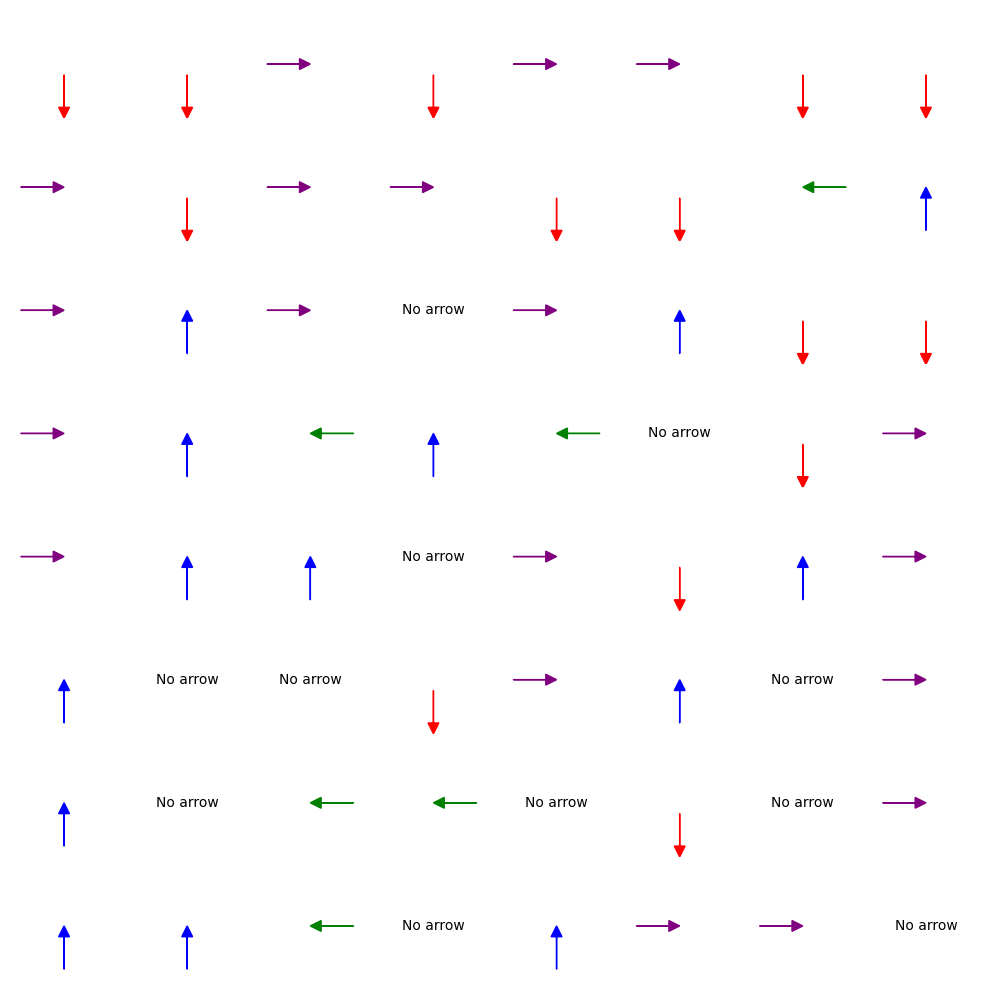

In [20]:
import matplotlib.pyplot as plt

width_of_grid=8 #change based on 4x4 or 8x8

# Create a nxn grid of subplots
fig, axes = plt.subplots(width_of_grid, width_of_grid, figsize=(10, 10))

# Define a function to draw arrows based on your conditions
def draw_arrow(ax, direction):
    if direction == 3 : #"up":
        ax.arrow(0.5, 0.1, 0, 0.3, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    elif direction == 1 : #"down":
        ax.arrow(0.5, 0.4, 0, -0.3, head_width=0.1, head_length=0.1, fc='red', ec='red')
    elif direction == 0 : #"left":
        ax.arrow(0.9, 0.5, -0.3, 0, head_width=0.1, head_length=0.1, fc='green', ec='green')
    elif direction == 2 : #"right":
        ax.arrow(0.1, 0.5, 0.3, 0, head_width=0.1, head_length=0.1, fc='purple', ec='purple')
    else:
        ax.text(0.5, 0.5, "No arrow", ha='center', va='center')

directions=np.ones(width_of_grid**2)*4
for key, value in sorted(Q.items()):
    list1=value.tolist()
    # print(list.index(max(value)))
    directions[key]=(list1.index(max(value)))
# print(directions)

# Loop through the grid and draw arrows based on directions
for i in range(width_of_grid):
    for j in range(width_of_grid):
        ax = axes[i, j]
        direction = directions[i * width_of_grid + j]
        draw_arrow(ax, direction)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')

plt.tight_layout()
plt.show()


## Color coded Q Table with states on the vertical axis and actions on the horizontal

+------+------------------------+------------------------+------------------------+------------------------+
|  0   |          left          |          down          |         right          |           up           |
+------+------------------------+------------------------+------------------------+------------------------+
| 0.0  |  0.028176330758539873  |  0.034642063525550854  |  0.00510775319539632   |  0.014309976197554095  |
| 1.0  |  0.01626181075983234   |  0.02962941160937357   |  0.008762514350065313  |  0.008684401109753371  |
| 2.0  |  0.011592134757744618  |  0.02091547249728278   |  0.07041172921713568   |  0.011448243726186738  |
| 3.0  |  0.020101090320669365  |  0.06360768777731547   |  0.018784947373869695  |  0.021013383372074014  |
| 4.0  |  0.01875745705360621   |  0.018722780337805184  |  0.05198177305300063   |  0.03613104381449142   |
| 5.0  |  0.039039371394092456  |  0.03327044065247724   |  0.15104188250682804   |  0.060266914057868305  |
| 6.0  |  0.0438201

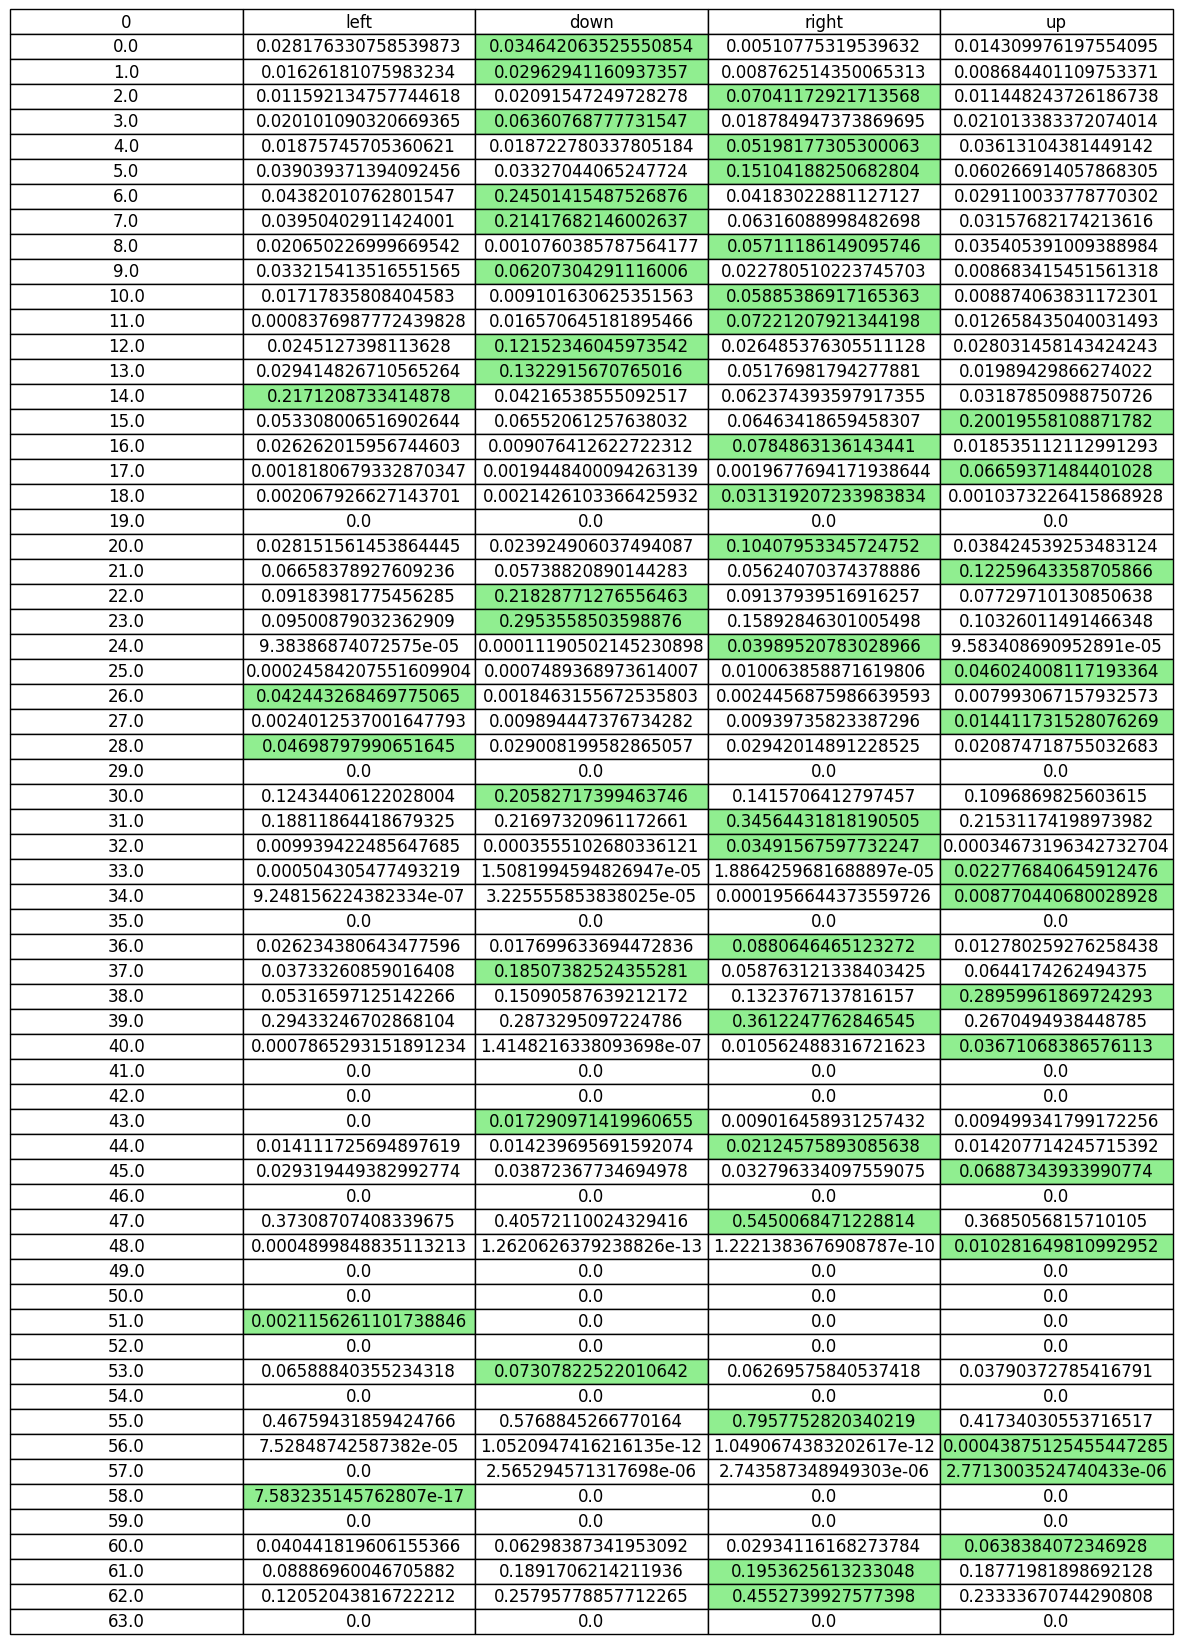

In [21]:
import pandas as pd
from tabulate import tabulate

for num in range(width_of_grid**2):
    # if key in Q
    if num not in Q.keys():
        Q[num] = [0,0,0,0]
        # value = [0,0,0,0] #np.random.choice(np.arange(4), p=get_probs(Q[state], epsilon)) 
        # print('test')
                                    
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(sorted(Q.items()))

# Split the Q value column into separate columns
df['left'] = df[1].apply(lambda x: x[0] if len(x) > 0 else None)
df['down'] = df[1].apply(lambda x: x[1] if len(x) > 1 else None)
df['right'] = df[1].apply(lambda x: x[2] if len(x) > 2 else None)
df['up'] = df[1].apply(lambda x: x[3] if len(x) > 3 else None)


# Drop the original 'Hobbies' column
df.drop(1, axis=1, inplace=True)

# print(df)    #uncomment
# Export the DataFrame to a excel file
# df.to_excel('4by4table.xlsx', index=False)

# Convert the DataFrame to a table figure
table_figure = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

# Print the table figure
print(table_figure) # uncomment

# Create a table-like figure using matplotlib
fig, ax = plt.subplots(figsize=(15, 6))
ax.axis('tight')
ax.axis('off')

# Define cell colors
cell_colors = [['white'] * len(df.columns) for _ in range(len(df) + 1)]  # Initialize with white

# Filter rows that have all zeros
df_filtered = df.loc[(df.iloc[:, 1:] != 0).any(axis=1)]
# print(df_filtered)

# Find the column with the maximum value in each row
max_columns = df_filtered.iloc[:, 1:].idxmax(axis=1)
max_rows = df_filtered.index

# for i in max_rows:
#     print(i)
# print(max_columns)
# Highlight the maximum value in each row
j=0
for i in max_rows:#range(len(max_columns)):
    max_index = df_filtered.columns.get_loc(max_columns.iloc[j])
    cell_colors[i+1][max_index] = 'lightgreen'  # Highlight with a light green color
    j+=1


table_data = [df.columns.tolist()]  # Include the column names as the first row
for i in range(len(df)):
    table_data.append(df.iloc[i].tolist())

# ax.table(cellText=table_data, cellLoc='center', loc='center')
# Create the table with cell colors
table = ax.table(cellText=table_data, cellColours=cell_colors, cellLoc='center', loc='center')

# Set the table font size
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the cell height by changing the scale (e.g., 1.5 for 1.5 times the height)

plt.show()
